In [417]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [418]:
def analyt_sol(t, k, m, x_0, v_0):
    return x_0*np.cos((np.sqrt(k/m))*t)+(v_0/np.sqrt(k/m))*np.sin((np.sqrt(k/m))*t)
def analyt_vel(t, k, m, x_0, v_0):
    return -x_0*np.sqrt(k/m)*np.sin((np.sqrt(k/m))*t)+v_0*np.cos((np.sqrt(k/m))*t)

1. timestep, dt
2. number of timestamps, n
3. initial conditions:

x(t=0) = x_0
v(t=0) = v_0
k
m

4. algorithm

x(t+dt) = x(t) + v(t)*dt
v(t+dt) = v(t) + a(t)*dt

5. given

a(t) = -k/m*x(t)

In [419]:
n = 10000
dt = 0.01

x_0 = 0
v_0 = 1
k = 1
m = 1

In [420]:
t = np.zeros(n, dtype=float)
len(t)

10000

In [421]:
for i in range(n):
    t[i] = i*dt
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


In [422]:
x = np.zeros(n, dtype=float)
v = np.zeros(n, dtype=float)

In [423]:
x_analytical = analyt_sol(t, k, m, x_0, v_0)
v_analytical = analyt_vel(t, k, m, x_0, v_0)

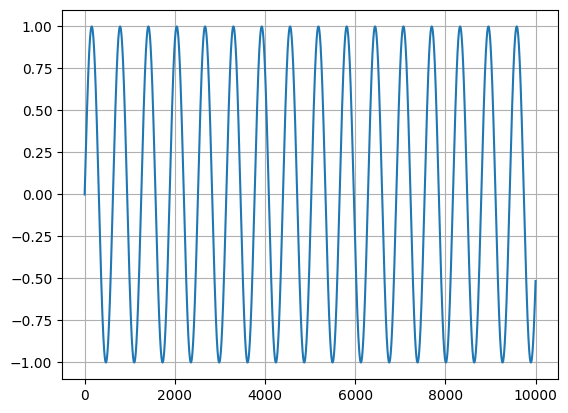

In [424]:
plt.plot(x_analytical)
plt.grid()
plt.show()

In [425]:
#Euler Method

x[0] = x_0
v[0] = v_0
for i in range(1, n):
    x[i] = x[i-1] + v[i-1]*dt
    v[i] = (-k/m)*x[i-1]*dt + v[i-1]

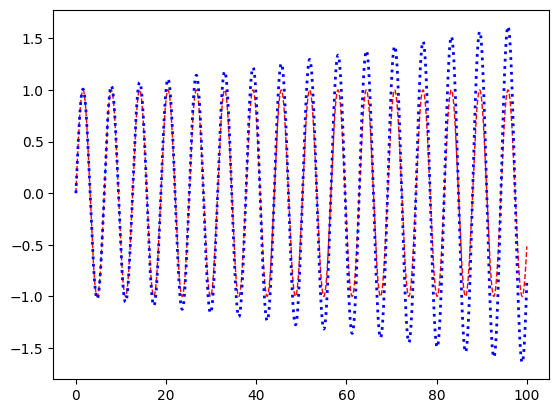

In [426]:
plt.plot(t, x_analytical, color='r', lw='1', ls='dashed')
plt.plot(t, x, color='b', lw='2', ls='dotted')

In [427]:
#Modified Euler

x_me = np.zeros(n, dtype=float)
v_me = np.zeros(n, dtype=float)

x_me[0] = x_0
v_me[0] = v_0

for i in range(1, n):
    v_me[i] = v_me[i-1] + (-k/m)*x_me[i-1]*dt
    x_me[i] = v_me[i]*dt + x_me[i-1]


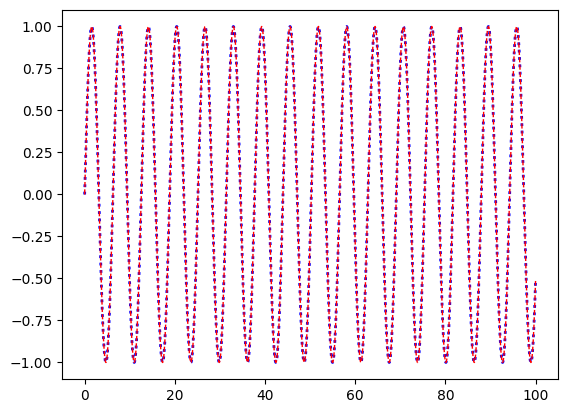

In [428]:
plt.plot(t, x_me, color='b', lw='2', ls='dotted')
plt.plot(t, x_analytical, color='r', lw='1', ls='dashed')
plt.show()

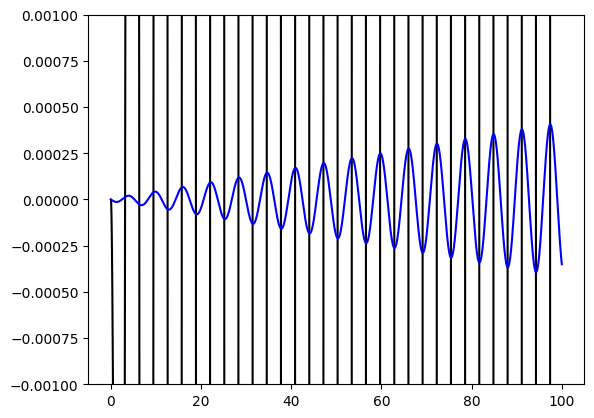

In [429]:
error = x_analytical-x
error_me = x_analytical-x_me

plt.ylim([-0.001, 0.001])
plt.plot(t, error, color = 'k')
plt.plot(t, error_me, color = 'b')
plt.show()

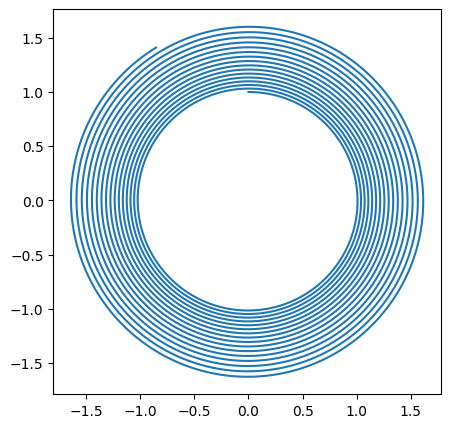

In [430]:
plt.figure(figsize=(5,5))
plt.plot(x, v)
plt.show()

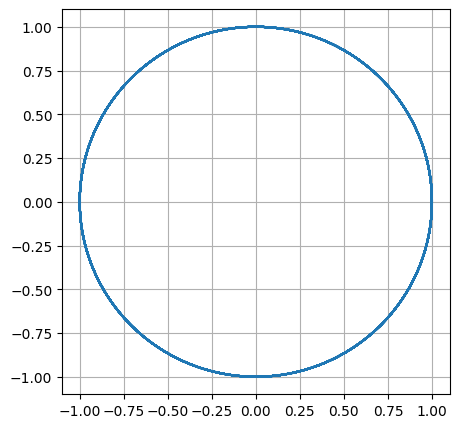

In [431]:
plt.figure(figsize=(5,5))
plt.plot(x_analytical, v_analytical)
plt.grid()
plt.show()

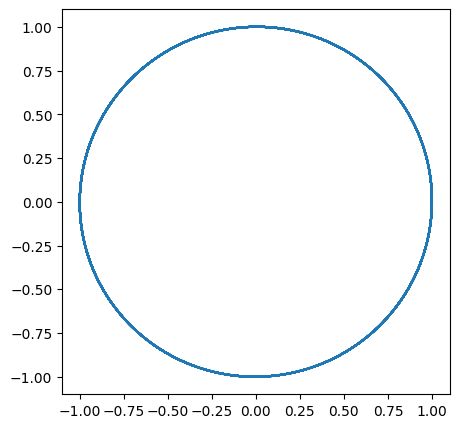

In [432]:
plt.figure(figsize=(5,5))
plt.plot(x_me, v_me)
plt.show()

In [433]:
pot_E = 0.5*k*x*x
kin_E = 0.5*m*v*v
tot_E = pot_E + kin_E

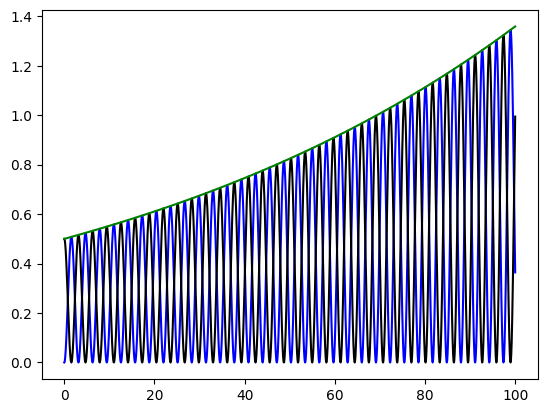

In [434]:
plt.plot(t, pot_E, color = 'b')
plt.plot(t, kin_E, color = 'k')
plt.plot(t, tot_E, color = 'g')
plt.show()

In [435]:
pot_E_analyt = 0.5*k*x_analytical*x_analytical
kin_E_analyt = 0.5*m*v_analytical*v_analytical
tot_E_analyt = pot_E_analyt + kin_E_analyt

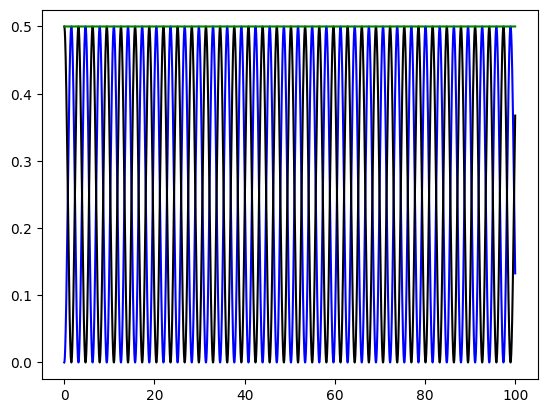

In [436]:
plt.plot(t, pot_E_analyt, color = 'b')
plt.plot(t, kin_E_analyt, color = 'k')
plt.plot(t, tot_E_analyt, color = 'g')
plt.show()

In [437]:
pot_E_me = 0.5*k*x_me*x_me
kin_E_me = 0.5*m*v_me*v_me
tot_E_me = pot_E_me + kin_E_me

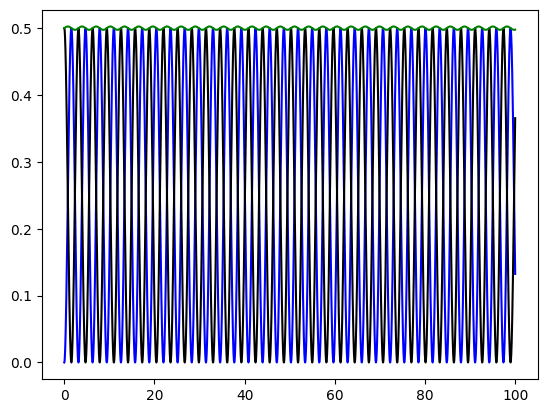

In [438]:
plt.plot(t, pot_E_me, color = 'b')
plt.plot(t, kin_E_me, color = 'k')
plt.plot(t, tot_E_me, color = 'g')
plt.show()

# Verlet

In [ ]:
x_verlet = np.zeros(n, dtype=float)
v_verlet = np.zeros(n, dtype=float)

## Error Matrix

In [442]:
M = np.array([[1, dt], [(-k/m)*dt, 1]])
M

array([[ 1.  ,  0.01],
       [-0.01,  1.  ]])

In [444]:
eig_val,  eig_vec = np.linalg.eig(M)
eig_vec

array([[0.        -0.70710678j, 0.        +0.70710678j],
       [0.70710678+0.j        , 0.70710678-0.j        ]])